In [ ]:
import axelrod as axl

In [ ]:
import pandas as pd

from keras.models import load_model

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
from keras.models import Sequential

In [7]:
from keras.layers import (
    LSTM,
    Bidirectional,
    CuDNNLSTM,
    Dense,
    Dropout,
    RepeatVector,
    TimeDistributed,
)

In [8]:
from keras.layers.embeddings import Embedding

**classification**

In [9]:
drop_out_rate = 0.2

In [11]:
model = Sequential()

model.add(
        LSTM(
            100, return_sequences=True, input_shape=(None, 1)
        )
    )

model.add(Dropout(rate=drop_out_rate))

model.add(Dense(1, activation="sigmoid"))

In [12]:
model.load_weights('hawk_output/output_lstm/final_lstm_model_5.h5')

In [13]:
test_input  = np.array([0, 1, 2])
test_input = test_input.reshape((1, 3, 1))

In [14]:
model.predict(test_input)[0][-1]

array([0.8121015], dtype=float32)

In [15]:
def reshape_history_lstm_model(history):
    return np.array(history).reshape(1, len(history), 1)

In [16]:
from axelrod.random_ import random_choice

C, D = axl.Action.C, axl.Action.D

class LSTMPlayer(axl.Player):
    name = "The LSTM homie"
    classifier = {
        "memory_depth": float("inf"),
        "stochastic": False,
        "inspects_source": False,
        "manipulates_source": False,
        "manipulates_state": False,
    }

    def __init__(self, model, reshape_history_funct, opening_probability=0.70):
        self.model = model
        self.opening_probability = opening_probability
        self.reshape_history_function = reshape_history_funct
        super().__init__()

    def strategy(self, opponent):
        if len(self.history) == 0:
            return random_choice(self.opening_probability)

        history = [action.value for action in opponent.history]

        prediction = self.model.predict(self.reshape_history_function(history))
    

        return axl.Action(round(prediction[0][-1][0]))

    def __repr__(self):
        return self.name

In [17]:
player = LSTMPlayer(model , reshape_history_lstm_model)

In [18]:
match = axl.Match([player, axl.Grudger()], turns=5)

In [19]:
_ = match.play()

In [20]:
match.result

[(D, C), (C, D), (D, D), (D, D), (D, D)]

In [21]:
valids = [pd.read_csv(f'hawk_output/output_lstm/validation_measures_run_100_{i}.csv',
                    index_col=0) for i in range(1, 6)]

In [22]:
valid = pd.concat(valids).reset_index()

In [23]:
len(valid)

5000

In [24]:
valid.columns

Index(['index', 'acc', 'val_acc', 'loss', 'val_loss'], dtype='object')

In [25]:
valid[['acc', 'val_acc']].head()

,acc,val_acc
0,0.784263,0.790209
1,0.796543,0.804337
2,0.801712,0.804825
3,0.799004,0.804526
4,0.804468,0.803885


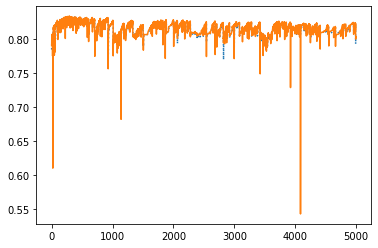

In [26]:
plt.plot(valid['acc'], ':')
plt.plot(valid['val_acc']);

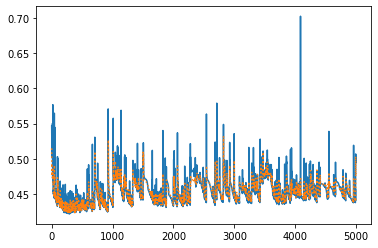

In [27]:
plt.plot(valid['val_loss']);
plt.plot(valid['loss'], ':')

In [49]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]

In [50]:
tournament = axl.Tournament(players=strategies_tournament, turns=204, repetitions=10)

In [51]:
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


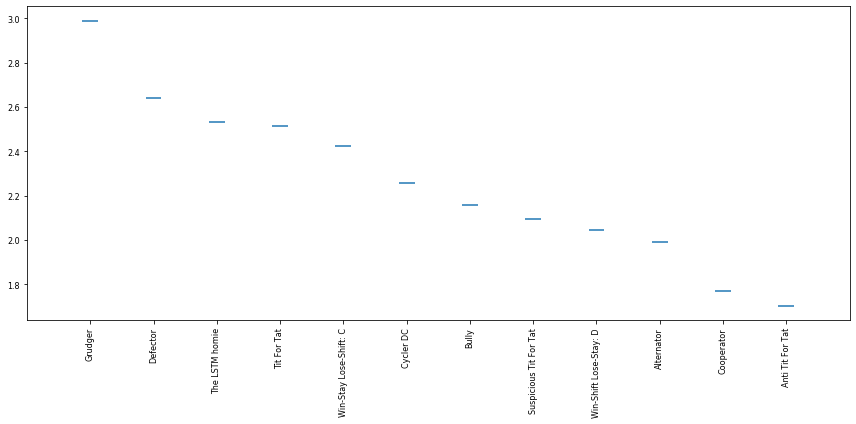

In [52]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

In [53]:
model.load_weights('hawk_output/output_lstm/final_lstm_model_5.h5')

In [54]:
player = LSTMPlayer(model , reshape_history_lstm_model)

In [55]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament, turns=204, repetitions=10)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


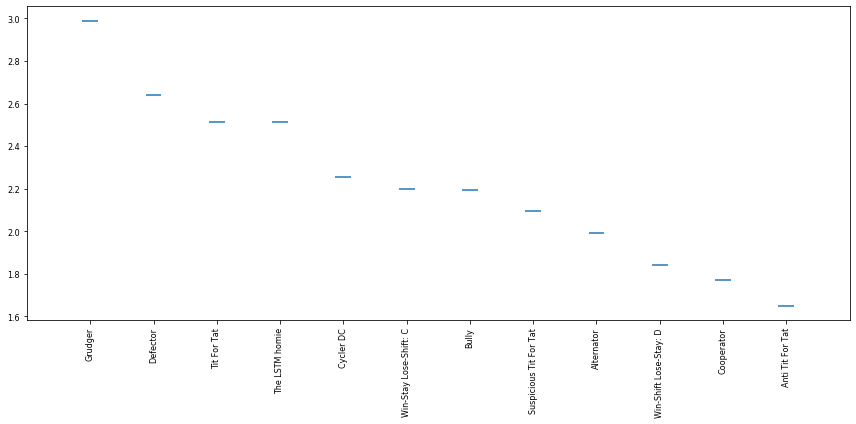

In [56]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

**Predict own data**

In [112]:
from importlib.machinery import SourceFileLoader

tools = SourceFileLoader("tools", "train_lstm.py").load_module()

In [113]:
outputs = pd.read_csv("data/targets.csv", index_col=0, nrows=1000)
y = tools.format_sequences_to_output(outputs)

sequences = pd.read_csv("data/sequences.csv", index_col=0, nrows=1000)
inputs = tools.format_sequences_to_input(sequences)

In [114]:
y[-30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [115]:
inputs[-30]

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0])

In [116]:
inputs[-30].shape

(204,)

In [117]:
model.predict(inputs[-30].reshape(1, 204, 1))

array([[[0.8796866 ],
        [0.86917883],
        [0.29373693],
        [0.24996844],
        [0.02862731],
        [0.01995292],
        [0.02985868],
        [0.05387262],
        [0.03093144],
        [0.02887726],
        [0.0409762 ],
        [0.02842844],
        [0.04366183],
        [0.09792021],
        [0.09381932],
        [0.03800121],
        [0.03449011],
        [0.07274333],
        [0.06501108],
        [0.04114074],
        [0.03836063],
        [0.07653537],
        [0.06838796],
        [0.03150693],
        [0.02669027],
        [0.05328289],
        [0.06231096],
        [0.0276956 ],
        [0.02518958],
        [0.05698955],
        [0.05830318],
        [0.0229688 ],
        [0.019198  ],
        [0.05076811],
        [0.28602952],
        [0.47736502],
        [0.7754152 ],
        [0.9110073 ],
        [0.90189636],
        [0.9002011 ],
        [0.90064436],
        [0.9216983 ],
        [0.932068  ],
        [0.9336466 ],
        [0.9327843 ],
        [0